In [91]:
import sys, pandas_profiling
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

from collections import OrderedDict
np.set_printoptions(suppress=True, threshold=sys.maxsize)

In [2]:
%matplotlib inline
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.2f}'.format


In [3]:
df_may_wind = pd.read_excel('MAY_Wind_Data.xlsx')
df_may_wind.shape

(310, 15)

In [4]:
df_may_wind.head()

,Year,Month,Day,00_Wind Direction,00_In degree,00_Wind Speed,06_Wind Direction,06_In degree,06_Wind Speed,12_Wind Direction,12_In degree,12_Wind Speed,18_Wind Direction,18_In degree,18_Wind Speed
0,2010,May,1,W,270.00,19,W,270.00,18,W,270.00,12,W,270.00,11
1,2010,May,2,W,270.00,19,WNW,292.50,14,WNW,292.50,15,SW,225.00,19
2,2010,May,3,WSW,247.50,19,W,270.00,18,WSW,247.50,21,S,180.00,20
3,2010,May,4,SSW,202.50,18,SW,225.00,15,SW,225.00,20,SW,225.00,15
4,2010,May,5,W,270.00,18,W,270.00,17,SW,225.00,23,SW,225.00,19


In [5]:
df_may_wind['Hour'] = [[0, 6, 12, 18]] * len(df_may_wind)
df_may_wind['Wind_Direction'] = df_may_wind[['00_Wind Direction', '06_Wind Direction', 
                                             '12_Wind Direction', '18_Wind Direction']].values.tolist()
df_may_wind['Wind_Speed'] = df_may_wind[['00_Wind Speed', '06_Wind Speed', 
                                         '12_Wind Speed', '18_Wind Speed']].values.tolist()

In [6]:
df_formatted = df_may_wind.apply(pd.Series.explode).reset_index()
df_formatted.drop(columns=['00_Wind Direction', '00_In degree', '00_Wind Speed', 
                           '06_Wind Direction', '06_In degree', '06_Wind Speed', 
                           '12_Wind Direction', '12_In degree', '12_Wind Speed', 
                           '18_Wind Direction', '18_In degree', '18_Wind Speed', 'index'], inplace=True)



In [7]:
df_formatted['Wind_Direction'] = df_formatted['Wind_Direction'].str.upper()

In [8]:
df_formatted['Month'] = df_formatted['Month'].str.replace('May', '05')
df_formatted['Month'] = df_formatted['Month'].astype('int64')
df_formatted['Hour'] = df_formatted['Hour'].astype('int64')


In [9]:
df_formatted['Datetime'] = pd.to_datetime(df_formatted[['Year', 'Month', 'Day', 'Hour']], format="%Y%M%d%H")

In [10]:
df_formatted.dtypes

Year                       int64
Month                      int64
Day                        int64
Hour                       int64
Wind_Direction            object
Wind_Speed                object
Datetime          datetime64[ns]
dtype: object

In [11]:
df_formatted.head(100)

,Year,Month,Day,Hour,Wind_Direction,Wind_Speed,Datetime
0,2010,5,1,0,W,19,2010-05-01 00:00:00
1,2010,5,1,6,W,18,2010-05-01 06:00:00
2,2010,5,1,12,W,12,2010-05-01 12:00:00
3,2010,5,1,18,W,11,2010-05-01 18:00:00
4,2010,5,2,0,W,19,2010-05-02 00:00:00
5,2010,5,2,6,WNW,14,2010-05-02 06:00:00
6,2010,5,2,12,WNW,15,2010-05-02 12:00:00
7,2010,5,2,18,SW,19,2010-05-02 18:00:00
8,2010,5,3,0,WSW,19,2010-05-03 00:00:00
9,2010,5,3,6,W,18,2010-05-03 06:00:00


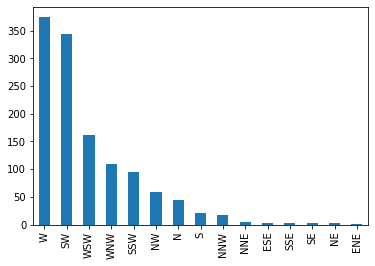

In [31]:
df_formatted.Wind_Direction.value_counts().plot(kind='bar')

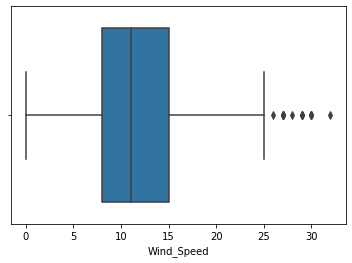

In [32]:
sns.boxplot(df_formatted.Wind_Speed)

In [37]:
all_var_names = ['n_1_hour', 'n_2_hour', 'n_3_hour', 'n_1_day', 'n_1_day_mean', 'n_2_day', 'n_2_day_mean',
                         'n_1_week', 'n_1_week_mean', 'n_1_year', 'n_1_year_mean', 'n_2_year', 'n_2_year_mean']

In [27]:
def timeseries_supervised(df):
    """
    
    """
    supervised_df = df.copy()
    c = 0
    
    for index, row in df.iterrows():
        now = row.Datetime 
        print(f"Processing {now}")
        # Calculate n-1, n-2, n-3, n-4 hours data
        n_1_hour = now - pd.Timedelta(value=6, unit='H')
        n_2_hour = now - pd.Timedelta(value=12, unit='H')
        n_3_hour = now - pd.Timedelta(value=18, unit='H')


        # Calculate n-1 day's data & mean of (n-1) day's data (3 values)
        n_1_day = now - pd.Timedelta(value=1, unit='D')
        # below might be redundant
        n_1_day_mean = [n_1_day, n_1_day - pd.Timedelta(value=6, unit='H'),
                            n_1_day + pd.Timedelta(value=6, unit='H')]
        # Calculate n-2 day's data & mean of (n-2) day's data (3 values)
        n_2_day = now - pd.Timedelta(value=2, unit='D')
        n_2_day_mean = [n_2_day, n_2_day - pd.Timedelta(value=6, unit='H'),
                            n_2_day + pd.Timedelta(value=6, unit='H')]

        # Calculate n-1 week's data & mean of (n-1) week's day data (3 values)
        n_1_week = now - pd.Timedelta(value=1, unit='W')
        n_1_week_mean = [n_1_week, n_1_week - pd.Timedelta(value=6, unit='H'),
                            n_1_week + pd.Timedelta(value=6, unit='H')]

        # Calculate n-1 year's data & mean of (n-1) year's day data (3 values)
        n_1_year = now - pd.Timedelta(value=1, unit='Y')
        n_1_year_mean = [n_1_year, n_1_year - pd.Timedelta(value=6, unit='H'), 
                            n_1_year + pd.Timedelta(value=6, unit='H')]

        # Calculate n-2 year's data & mean of (n-2) year's day data (3 values)
        n_2_year = now - pd.Timedelta(value=2, unit='Y')
        n_2_year_mean = [n_2_year, n_2_year - pd.Timedelta(value=6, unit='H'), 
                            n_2_year + pd.Timedelta(value=6, unit='H')]
        
        all_vars = [n_1_hour, n_2_hour, n_3_hour, n_1_day, n_1_day_mean, n_2_day, n_2_day_mean,
                    n_1_week, n_1_week_mean, n_1_year, n_1_year_mean, n_2_year, n_2_year_mean]
        all_var_names = ['n_1_hour', 'n_2_hour', 'n_3_hour', 'n_1_day', 'n_1_day_mean', 'n_2_day', 'n_2_day_mean',
                         'n_1_week', 'n_1_week_mean', 'n_1_year', 'n_1_year_mean', 'n_2_year', 'n_2_year_mean']
        
        for i, current_variable in enumerate(all_vars):
            
            if type(current_variable) == list:
                current_variable = [var.replace(minute=0, second=0) for var in current_variable]
                # print(current_variable)
                try:
                    supervised_df.loc[index, f"WS_{all_var_names[i]}"] = \
                        df[df.Datetime.isin(current_variable)].Wind_Speed.mean()
                except ValueError:
                    supervised_df.loc[index, f"WS_{all_var_names[i]}"] = np.nan
                
                try:
                    supervised_df.loc[index, f"WD_{all_var_names[i]}"] = \
                        df[df.Datetime.isin(current_variable)].Wind_Direction.mode()[0]
                except (ValueError, KeyError, IndexError):
                    supervised_df.loc[index, f"WD_{all_var_names[i]}"] = np.nan
                
            
            else:
                current_variable = current_variable.replace(minute=0, second=0)
                # print(current_variable)
                # if 'year' in all_var_names[i]:
                #    print(current_variable)
                try:
                    supervised_df.loc[index, f"WS_{all_var_names[i]}"] = \
                        df[df.Datetime == current_variable].Wind_Speed.values
                except ValueError:
                    supervised_df.loc[index, f"WS_{all_var_names[i]}"] = np.nan
                
                try:
                    supervised_df.loc[index, f"WD_{all_var_names[i]}"] = \
                        df[df.Datetime == current_variable].Wind_Direction.values
                except ValueError:
                    supervised_df.loc[index, f"WD_{all_var_names[i]}"] = np.nan
            
        c += 1
        # if c == 10:
        #    break

    return supervised_df

In [104]:
%%time
supervised_df = timeseries_supervised(df=df_formatted.copy())

Processing 2010-05-01 00:00:00
Processing 2010-05-01 06:00:00
Processing 2010-05-01 12:00:00
Processing 2010-05-01 18:00:00
Processing 2010-05-02 00:00:00
Processing 2010-05-02 06:00:00


/anaconda3/envs/aliva/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: M and Y units are deprecated and will be removed in a future version.
/anaconda3/envs/aliva/lib/python3.7/site-packages/ipykernel_launcher.py:38: FutureWarning: M and Y units are deprecated and will be removed in a future version.


Processing 2010-05-02 12:00:00
Processing 2010-05-02 18:00:00
Processing 2010-05-03 00:00:00
Processing 2010-05-03 06:00:00
Processing 2010-05-03 12:00:00
Processing 2010-05-03 18:00:00
Processing 2010-05-04 00:00:00
Processing 2010-05-04 06:00:00
Processing 2010-05-04 12:00:00
Processing 2010-05-04 18:00:00
Processing 2010-05-05 00:00:00
Processing 2010-05-05 06:00:00
Processing 2010-05-05 12:00:00
Processing 2010-05-05 18:00:00
Processing 2010-05-06 00:00:00
Processing 2010-05-06 06:00:00
Processing 2010-05-06 12:00:00
Processing 2010-05-06 18:00:00
Processing 2010-05-07 00:00:00
Processing 2010-05-07 06:00:00
Processing 2010-05-07 12:00:00
Processing 2010-05-07 18:00:00
Processing 2010-05-08 00:00:00
Processing 2010-05-08 06:00:00
Processing 2010-05-08 12:00:00
Processing 2010-05-08 18:00:00
Processing 2010-05-09 00:00:00
Processing 2010-05-09 06:00:00
Processing 2010-05-09 12:00:00
Processing 2010-05-09 18:00:00
Processing 2010-05-10 00:00:00
Processing 2010-05-10 06:00:00
Processi

Processing 2012-05-08 00:00:00
Processing 2012-05-08 06:00:00
Processing 2012-05-08 12:00:00
Processing 2012-05-08 18:00:00
Processing 2012-05-09 00:00:00
Processing 2012-05-09 06:00:00
Processing 2012-05-09 12:00:00
Processing 2012-05-09 18:00:00
Processing 2012-05-10 00:00:00
Processing 2012-05-10 06:00:00
Processing 2012-05-10 12:00:00
Processing 2012-05-10 18:00:00
Processing 2012-05-11 00:00:00
Processing 2012-05-11 06:00:00
Processing 2012-05-11 12:00:00
Processing 2012-05-11 18:00:00
Processing 2012-05-12 00:00:00
Processing 2012-05-12 06:00:00
Processing 2012-05-12 12:00:00
Processing 2012-05-12 18:00:00
Processing 2012-05-13 00:00:00
Processing 2012-05-13 06:00:00
Processing 2012-05-13 12:00:00
Processing 2012-05-13 18:00:00
Processing 2012-05-14 00:00:00
Processing 2012-05-14 06:00:00
Processing 2012-05-14 12:00:00
Processing 2012-05-14 18:00:00
Processing 2012-05-15 00:00:00
Processing 2012-05-15 06:00:00
Processing 2012-05-15 12:00:00
Processing 2012-05-15 18:00:00
Processi

Processing 2014-05-13 12:00:00
Processing 2014-05-13 18:00:00
Processing 2014-05-14 00:00:00
Processing 2014-05-14 06:00:00
Processing 2014-05-14 12:00:00
Processing 2014-05-14 18:00:00
Processing 2014-05-15 00:00:00
Processing 2014-05-15 06:00:00
Processing 2014-05-15 12:00:00
Processing 2014-05-15 18:00:00
Processing 2014-05-16 00:00:00
Processing 2014-05-16 06:00:00
Processing 2014-05-16 12:00:00
Processing 2014-05-16 18:00:00
Processing 2014-05-17 00:00:00
Processing 2014-05-17 06:00:00
Processing 2014-05-17 12:00:00
Processing 2014-05-17 18:00:00
Processing 2014-05-18 00:00:00
Processing 2014-05-18 06:00:00
Processing 2014-05-18 12:00:00
Processing 2014-05-18 18:00:00
Processing 2014-05-19 00:00:00
Processing 2014-05-19 06:00:00
Processing 2014-05-19 12:00:00
Processing 2014-05-19 18:00:00
Processing 2014-05-20 00:00:00
Processing 2014-05-20 06:00:00
Processing 2014-05-20 12:00:00
Processing 2014-05-20 18:00:00
Processing 2014-05-21 00:00:00
Processing 2014-05-21 06:00:00
Processi

Processing 2016-05-18 12:00:00
Processing 2016-05-18 18:00:00
Processing 2016-05-19 00:00:00
Processing 2016-05-19 06:00:00
Processing 2016-05-19 12:00:00
Processing 2016-05-19 18:00:00
Processing 2016-05-20 00:00:00
Processing 2016-05-20 06:00:00
Processing 2016-05-20 12:00:00
Processing 2016-05-20 18:00:00
Processing 2016-05-21 00:00:00
Processing 2016-05-21 06:00:00
Processing 2016-05-21 12:00:00
Processing 2016-05-21 18:00:00
Processing 2016-05-22 00:00:00
Processing 2016-05-22 06:00:00
Processing 2016-05-22 12:00:00
Processing 2016-05-22 18:00:00
Processing 2016-05-23 00:00:00
Processing 2016-05-23 06:00:00
Processing 2016-05-23 12:00:00
Processing 2016-05-23 18:00:00
Processing 2016-05-24 00:00:00
Processing 2016-05-24 06:00:00
Processing 2016-05-24 12:00:00
Processing 2016-05-24 18:00:00
Processing 2016-05-25 00:00:00
Processing 2016-05-25 06:00:00
Processing 2016-05-25 12:00:00
Processing 2016-05-25 18:00:00
Processing 2016-05-26 00:00:00
Processing 2016-05-26 06:00:00
Processi

Processing 2018-05-23 12:00:00
Processing 2018-05-23 18:00:00
Processing 2018-05-24 00:00:00
Processing 2018-05-24 06:00:00
Processing 2018-05-24 12:00:00
Processing 2018-05-24 18:00:00
Processing 2018-05-25 00:00:00
Processing 2018-05-25 06:00:00
Processing 2018-05-25 12:00:00
Processing 2018-05-25 18:00:00
Processing 2018-05-26 00:00:00
Processing 2018-05-26 06:00:00
Processing 2018-05-26 12:00:00
Processing 2018-05-26 18:00:00
Processing 2018-05-27 00:00:00
Processing 2018-05-27 06:00:00
Processing 2018-05-27 12:00:00
Processing 2018-05-27 18:00:00
Processing 2018-05-28 00:00:00
Processing 2018-05-28 06:00:00
Processing 2018-05-28 12:00:00
Processing 2018-05-28 18:00:00
Processing 2018-05-29 00:00:00
Processing 2018-05-29 06:00:00
Processing 2018-05-29 12:00:00
Processing 2018-05-29 18:00:00
Processing 2018-05-30 00:00:00
Processing 2018-05-30 06:00:00
Processing 2018-05-30 12:00:00
Processing 2018-05-30 18:00:00
Processing 2018-05-31 00:00:00
Processing 2018-05-31 06:00:00
Processi

In [105]:
supervised_df.shape

(1240, 33)

In [106]:
supervised_df.isna().sum() * 100 / len(supervised_df)

Year                0.00
Month               0.00
Day                 0.00
Hour                0.00
Wind_Direction      0.00
Wind_Speed          0.00
Datetime            0.00
WS_n_1_hour         0.81
WD_n_1_hour         0.81
WS_n_2_hour         1.61
WD_n_2_hour         1.61
WS_n_3_hour         2.42
WD_n_3_hour         2.42
WS_n_1_day          3.23
WD_n_1_day          3.23
WS_n_1_day_mean     2.42
WD_n_1_day_mean     2.42
WS_n_2_day          6.45
WD_n_2_day          6.45
WS_n_2_day_mean     5.65
WD_n_2_day_mean     5.65
WS_n_1_week        22.58
WD_n_1_week        22.58
WS_n_1_week_mean   21.77
WD_n_1_week_mean   21.77
WS_n_1_year        11.05
WD_n_1_year        11.05
WS_n_1_year_mean   10.32
WD_n_1_year_mean   10.32
WS_n_2_year        21.29
WD_n_2_year        21.29
WS_n_2_year_mean   20.65
WD_n_2_year_mean   20.65
dtype: float64

In [107]:
supervised_df

,Year,Month,Day,Hour,Wind_Direction,Wind_Speed,Datetime,WS_n_1_hour,WD_n_1_hour,WS_n_2_hour,WD_n_2_hour,WS_n_3_hour,WD_n_3_hour,WS_n_1_day,WD_n_1_day,WS_n_1_day_mean,WD_n_1_day_mean,WS_n_2_day,WD_n_2_day,WS_n_2_day_mean,WD_n_2_day_mean,WS_n_1_week,WD_n_1_week,WS_n_1_week_mean,WD_n_1_week_mean,WS_n_1_year,WD_n_1_year,WS_n_1_year_mean,WD_n_1_year_mean,WS_n_2_year,WD_n_2_year,WS_n_2_year_mean,WD_n_2_year_mean
0,2010,5,1,0,W,19,2010-05-01 00:00:00,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
1,2010,5,1,6,W,18,2010-05-01 06:00:00,19.00,W,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
2,2010,5,1,12,W,12,2010-05-01 12:00:00,18.00,W,19.00,W,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
3,2010,5,1,18,W,11,2010-05-01 18:00:00,12.00,W,18.00,W,19.00,W,nan,NaN,19.00,W,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
4,2010,5,2,0,W,19,2010-05-02 00:00:00,11.00,W,12.00,W,18.00,W,19.00,W,18.50,W,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,2019,5,30,18,SW,10,2019-05-30 18:00:00,9.00,SW,8.00,SW,6.00,SW,10.00,SW,8.33,SW,6.00,SW,5.00,SW,11.00,SW,10.00,N,13.00,SW,10.33,SW,16.00,W,14.67,WSW
1236,2019,5,31,0,SW,6,2019-05-31 00:00:00,10.00,SW,9.00,SW,8.00,SW,6.00,SW,8.00,SW,2.00,SW,4.67,SW,6.00,SSW,7.67,SSW,12.00,SW,8.33,SW,15.00,WSW,14.67,SW
1237,2019,5,31,6,SW,9,2019-05-31 06:00:00,6.00,SW,10.00,SW,9.00,SW,8.00,SW,7.67,SW,6.00,SW,5.67,SW,6.00,SSW,6.00,SSW,0.00,N,7.33,SW,13.00,SW,13.67,SSW
1238,2019,5,31,12,SW,9,2019-05-31 12:00:00,9.00,SW,6.00,SW,10.00,SW,9.00,SW,9.00,SW,9.00,SW,8.33,SW,6.00,SW,6.00,SW,10.00,SW,7.00,N,13.00,SSW,14.00,SW


In [44]:
with open('profile_report.html', 'w') as file:
    file.write(pandas_profiling.ProfileReport(supervised_df.drop(columns=['Year', 'Day', 'Month', 'Hour'])).to_html())

/anaconda3/envs/aliva/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [108]:
rejected_variables = pandas_profiling.ProfileReport(
    supervised_df.drop(columns=['Year', 'Day', 'Month', 'Hour'])).get_rejected_variables()

/anaconda3/envs/aliva/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [109]:
supervised_df.drop(columns=rejected_variables, inplace=True)

In [110]:
supervised_df.head()

,Year,Month,Day,Hour,Wind_Direction,Wind_Speed,Datetime,WS_n_1_hour,WD_n_1_hour,WS_n_2_hour,WD_n_2_hour,WS_n_3_hour,WD_n_3_hour,WS_n_1_day,WD_n_1_day,WD_n_1_day_mean,WS_n_2_day,WD_n_2_day,WD_n_2_day_mean,WS_n_1_week,WD_n_1_week,WS_n_1_week_mean,WD_n_1_week_mean,WS_n_1_year,WD_n_1_year,WD_n_1_year_mean,WS_n_2_year,WD_n_2_year,WS_n_2_year_mean,WD_n_2_year_mean
0,2010,5,1,0,W,19,2010-05-01 00:00:00,nan,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN
1,2010,5,1,6,W,18,2010-05-01 06:00:00,19.00,W,nan,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN
2,2010,5,1,12,W,12,2010-05-01 12:00:00,18.00,W,19.00,W,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN
3,2010,5,1,18,W,11,2010-05-01 18:00:00,12.00,W,18.00,W,19.00,W,nan,NaN,W,nan,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN
4,2010,5,2,0,W,19,2010-05-02 00:00:00,11.00,W,12.00,W,18.00,W,19.00,W,W,nan,NaN,NaN,nan,NaN,nan,NaN,nan,NaN,NaN,nan,NaN,nan,NaN


In [111]:
WD_columns = supervised_df.columns[supervised_df.columns.str.contains('WD')]
WS_columns = supervised_df.columns[supervised_df.columns.str.contains('WS')]

In [112]:
supervised_df[WD_columns] = supervised_df[WD_columns].fillna(
    supervised_df[WD_columns].mode(axis=0).iloc[0])

In [114]:
supervised_df[WS_columns] = supervised_df[WS_columns].fillna(
    supervised_df[WS_columns].mean(axis=0))

In [132]:
supervised_df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Wind_Direction', 'Wind_Speed',
       'Datetime', 'WS_n_1_hour', 'WD_n_1_hour', 'WS_n_2_hour', 'WD_n_2_hour',
       'WS_n_3_hour', 'WD_n_3_hour', 'WS_n_1_day', 'WD_n_1_day',
       'WD_n_1_day_mean', 'WS_n_2_day', 'WD_n_2_day', 'WD_n_2_day_mean',
       'WS_n_1_week', 'WD_n_1_week', 'WS_n_1_week_mean', 'WD_n_1_week_mean',
       'WS_n_1_year', 'WD_n_1_year', 'WD_n_1_year_mean', 'WS_n_2_year',
       'WD_n_2_year', 'WS_n_2_year_mean', 'WD_n_2_year_mean'],
      dtype='object')

In [134]:
def X_y(dataset, label, ):
    print(f"Shape of dataset: {dataset.shape}")
    X = dataset.drop(label, axis=1)
    y = dataset[label]
    print(f"X.shape: {X.shape}, y.shape: {y.shape}")
    return X, y

In [196]:
X, y = X_y(dataset=supervised_df[~supervised_df.Year.isin([2018, 2019])].copy(), 
           label='Wind_Speed')

Shape of dataset: (992, 30)
X.shape: (992, 29), y.shape: (992,)


In [122]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor

In [124]:
SCALERS = [
    None,
    StandardScaler(),
    RobustScaler(),
    MinMaxScaler()
]
REGRESSORS = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    SVR()
]
REGRESSORS_NAMES = OrderedDict([('LinearRegression', 'LR'),
                                ('KNeighborsRegressor', 'KNN'),
                                ('DecisionTreeRegressor', 'DTree'),
                                ('AdaBoostRegressor', 'AdaBoost'),
                                ('GradientBoostingRegressor', 'GrBoost'),
                                ('RandomForestRegressor', 'RForest'),
                                ('SVR', 'SVM')])

In [197]:
def run_all_models(X, y):
    import warnings; warnings.filterwarnings(action='ignore')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)
    print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

    cv_scores_df = pd.DataFrame()
    classification_report_dict = OrderedDict()
    
    _ = plt.figure(figsize=(15,8))
    
    for scaler in SCALERS:
        print("\n\n****************************************************************************************")
        print(f"Current Scaler: {scaler.__class__.__name__}")
        print("****************************************************************************************")
        
        cv_scores_dict, cost_estimations_dict  = OrderedDict(), OrderedDict()
        classification_report_dict[scaler.__class__.__name__] = {}
        
        for regressor in REGRESSORS:
            print("\n****************************************************************************************")
            print(f"Current Regressor: {regressor.__class__.__name__}")
            pipe = Pipeline(
                steps=[('scaler', scaler),
                       ('regressor', regressor)])
            pipe.fit(X_train, y_train)            
            
            y_predicted = pipe.predict(X_test)
            print(f"Test Score: {mean_squared_error(y_true=y_test, y_pred=y_predicted):.2f}")
            
            cross_val_scores = cross_val_score(estimator=pipe, 
                                               X=X_train, 
                                               y=y_train, 
                                               cv=5,
                                               scoring='r2')
            print(f"3 fold cross validation scores {cross_val_scores}")
            print(f"Mean CV MSE: {cross_val_scores.mean():.2f}\n")
            cv_scores_dict[regressor.__class__.__name__] = cross_val_scores.mean()
                        
        cv_scores_df = cv_scores_df.append(pd.DataFrame(cv_scores_dict, index = [scaler.__class__.__name__]))
        print("****************************************************************************************")

    return cv_scores_df, pipe


In [198]:
#%%time
cv_scores_df, pipe = run_all_models(
    X=X[WS_columns], 
    y=y)

X_train.shape: (744, 10), y_train.shape: (744,), X_test.shape: (248, 10), y_test.shape: (248,)


****************************************************************************************
Current Scaler: NoneType
****************************************************************************************

****************************************************************************************
Current Regressor: LinearRegression
Test Score: 8.76
3 fold cross validation scores [0.64950698 0.59071286 0.55973591 0.58164966 0.53311933]
Mean CV MSE: 0.58


****************************************************************************************
Current Regressor: KNeighborsRegressor
Test Score: 10.67
3 fold cross validation scores [0.56386509 0.55570418 0.4379385  0.45285024 0.42928713]
Mean CV MSE: 0.49


****************************************************************************************
Current Regressor: DecisionTreeRegressor
Test Score: 18.13
3 fold cross validation scores [ 0.24480125  0.

<Figure size 1500x800 with 0 Axes>

In [172]:
sorted(sklearn.metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [199]:
cv_scores_df

,LinearRegression,KNeighborsRegressor,DecisionTreeRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,SVR
NoneType,0.58,0.49,0.11,0.53,0.55,0.52,0.01
StandardScaler,0.58,0.50,0.09,0.54,0.55,0.48,0.53
RobustScaler,0.58,0.48,0.07,0.53,0.55,0.50,0.54
MinMaxScaler,0.58,0.49,0.12,0.52,0.55,0.49,0.50


In [201]:
test_2019_df = supervised_df[supervised_df.Year.isin([2018, 2019])]
X_2019_df = test_2019_df[WS_columns]
y_2019_df = test_2019_df.Wind_Speed

In [202]:
np.rint(pipe.predict(X_2019_df))

array([12., 11., 11., 11., 10., 11., 11., 10.,  9., 10., 11., 11., 11.,
       11., 12., 11.,  9., 10., 10., 11.,  9., 10., 10., 10., 10.,  9.,
       10.,  9.,  9.,  9., 10., 10.,  9.,  9., 10., 10.,  8.,  7.,  8.,
        8.,  6.,  7.,  8.,  8.,  7.,  9., 10.,  9.,  8.,  8.,  9.,  9.,
        7.,  8.,  8.,  8.,  7.,  8.,  9.,  8.,  7.,  8.,  9.,  7.,  6.,
        6.,  7.,  8.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  9.,  9., 10., 10.,  8.,  8., 10., 10.,  8.,  9.,  9.,
        8.,  7.,  9.,  9.,  9.,  8.,  9.,  9.,  8.,  8.,  7.,  9.,  8.,
        7.,  7.,  7.,  8.,  6.,  7.,  8.,  8.,  7.,  7.,  9.,  9.,  8.,
        8.,  9.,  9.,  9.,  9., 11.,  9., 12., 11., 11., 11., 10., 11.,
       11., 11., 10.,  9., 10., 12., 11., 11., 12., 13., 10., 11., 15.,
       11.,  9., 11., 11., 10.,  9.,  9.,  9.,  8.,  8.,  9., 10., 11.,
        9.,  9., 10., 11.,  9.,  9., 10., 10.,  9.,  8.,  9.,  9.,  7.,
        8., 10.,  9.,  8.,  8.,  9.,  9.,  8.,  9., 11., 11., 10

In [203]:
y_2019_df.values

array([6, 10, 12, 9, 6, 8, 10, 10, 7, 9, 13, 15, 6, 9, 10, 8, 7, 6, 10, 8,
       9, 7, 13, 6, 4, 7, 9, 10, 6, 4, 11, 10, 6, 6, 6, 6, 0, 2, 5, 4, 0,
       6, 11, 8, 7, 8, 6, 7, 3, 5, 9, 4, 2, 6, 9, 7, 0, 5, 11, 7, 0, 4, 0,
       6, 3, 5, 6, 4, 8, 6, 6, 5, 4, 6, 6, 7, 5, 6, 9, 15, 6, 7, 11, 7, 4,
       9, 13, 7, 4, 7, 8, 6, 6, 8, 13, 6, 5, 5, 7, 8, 0, 5, 6, 4, 0, 2, 7,
       6, 4, 4, 6, 8, 4, 6, 9, 6, 5, 6, 13, 12, 0, 10, 11, 7, 6, 6, 12,
       12, 9, 7, 7, 13, 6, 7, 19, 13, 4, 8, 22, 13, 4, 13, 11, 6, 7, 7, 7,
       6, 0, 6, 8, 14, 6, 6, 9, 11, 6, 6, 9, 9, 7, 9, 9, 7, 0, 3, 10, 8,
       4, 6, 9, 9, 5, 7, 11, 11, 7, 11, 11, 10, 4, 11, 11, 10, 4, 7, 6, 6,
       5, 6, 10, 7, 0, 4, 8, 3, 0, 0, 8, 6, 0, 6, 7, 0, 0, 6, 8, 3, 3, 3,
       8, 10, 5, 4, 13, 11, 6, 6, 6, 6, 2, 2, 9, 11, 8, 11, 11, 8, 9, 9,
       10, 7, 0, 6, 7, 6, 2, 6, 9, 10, 6, 8, 9, 10, 6, 9, 9, 17],
      dtype=object)

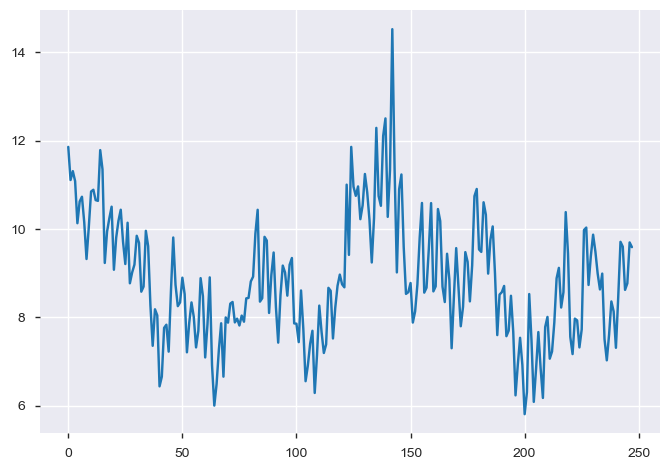

In [204]:
sns.lineplot(range(X_2019_df.shape[0]), pipe.predict(X_2019_df))

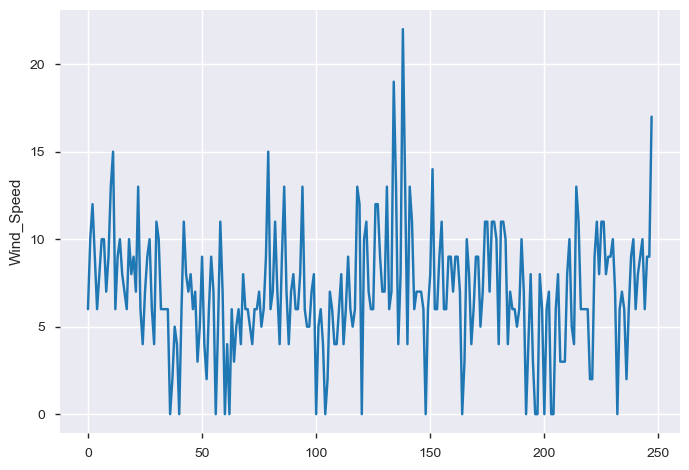

In [205]:
sns.lineplot(range(y_2019_df.shape[0]), y_2019_df.astype('int'))

In [208]:
r2_score(
    y_true=y_2019_df.values,
    y_pred=np.rint(pipe.predict(X_2019_df)))

-0.019901326532924868

In [209]:
from statsmodels.tsa.seasonal import seasonal_decompose

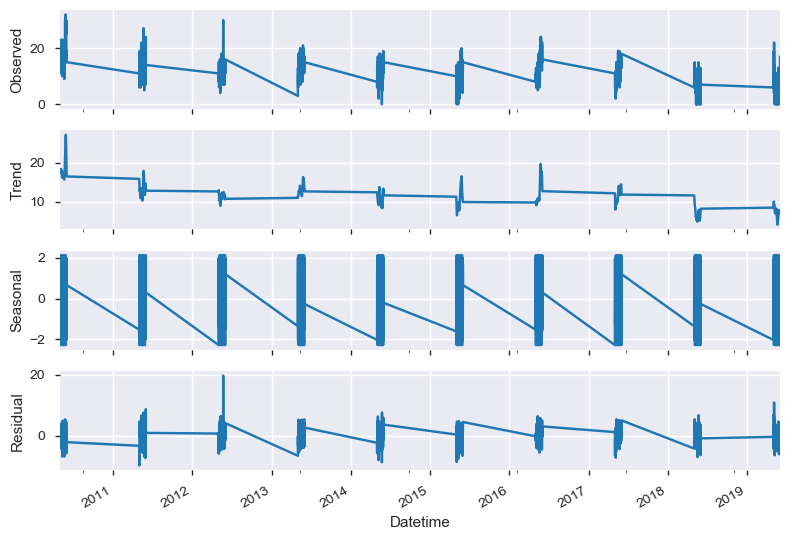

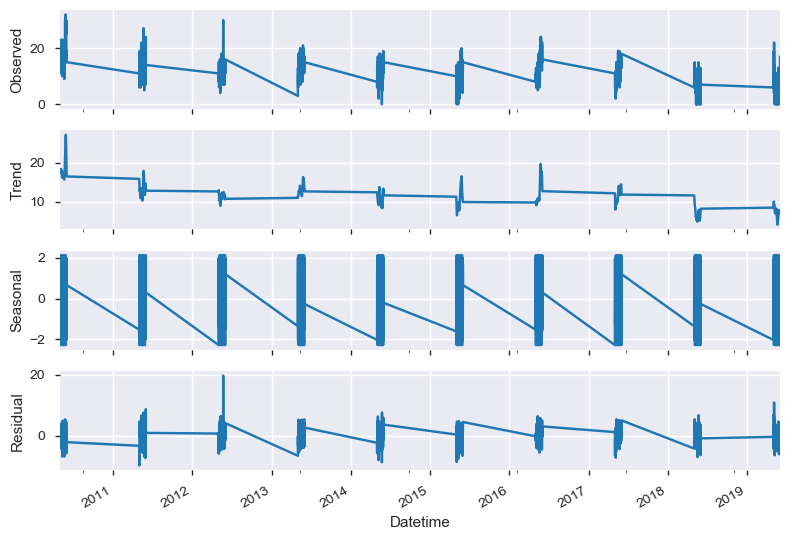

In [237]:
result = seasonal_decompose(x=supervised_df.set_index('Datetime').Wind_Speed, 
                            model='additive', freq=20)
result.plot()

In [216]:
supervised_df['Wind_Speed'] = supervised_df['Wind_Speed'].astype('int64')

In [227]:
supervised_df.set_index('Datetime').asfreq('d').index

DatetimeIndex(['2010-05-01', '2010-05-02', '2010-05-03', '2010-05-04',
               '2010-05-05', '2010-05-06', '2010-05-07', '2010-05-08',
               '2010-05-09', '2010-05-10',
               ...
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27', '2019-05-28', '2019-05-29',
               '2019-05-30', '2019-05-31'],
              dtype='datetime64[ns]', name='Datetime', length=3318, freq='D')